<a href="https://colab.research.google.com/github/Panaxnotoginseng/Exercise-1-Xinyue/blob/main/EX1_clean_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Results of English text: 

English word length frequency:
3 19800
2 18848
4 10955
7 10588
6 10084
5 8538
8 7012
9 5635
10 4374
11 3146
1 1474
12 1305
13 1212
14 775
15 53
17 36
16 32
18 4
19 3
20 1

There are 103875 words in total 



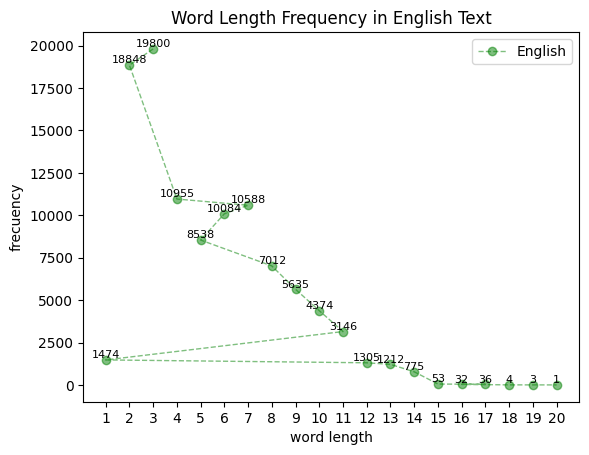

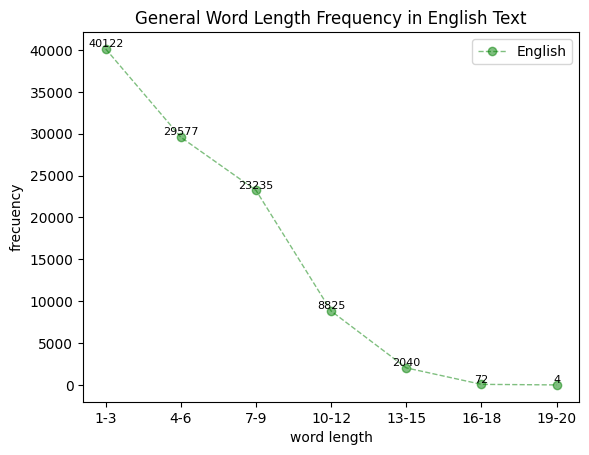




Results of Chinese text: 

Chinese word length frequency:
2 53913
1 24164
3 7004
4 1048
5 275
6 72
8 24
7 24
13 7
9 5
10 4
12 1
11 1

There are 86542 words in total 



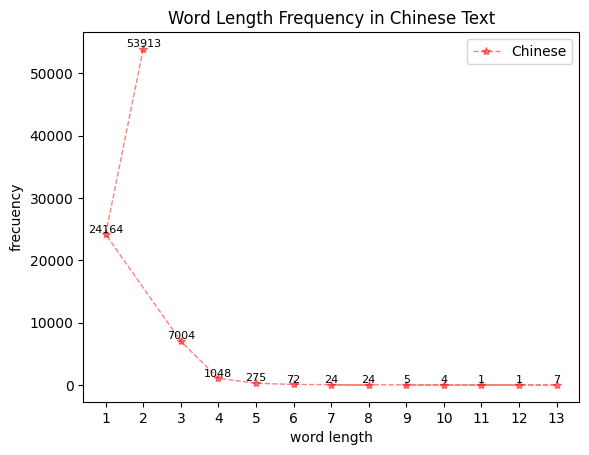




Results of Chinese text using jieba: 

Chinese word length frequency:
2 49643
1 23326
3 6549
4 3388
5 341
7 94
6 91
8 50
9 32
11 9
10 4
13 1

There are 83528 words in total 



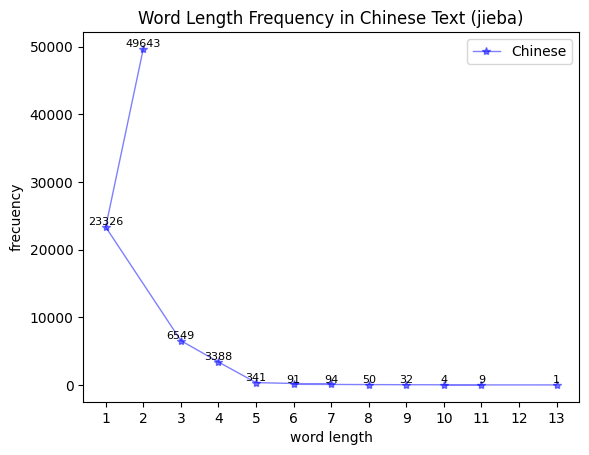


Compare all three results: 



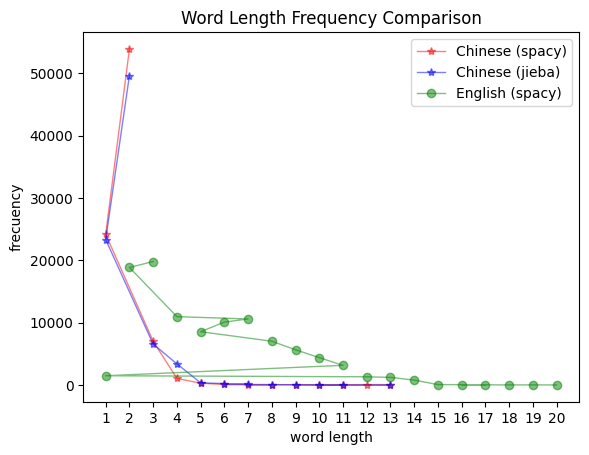

In [7]:
##prepare the English text.

en_text = open("en_text.txt", 'r', encoding = 'utf-8').read()  #open English text file as "en_text", decoded as UTF-8.

import spacy
nlp = spacy.load("en_core_web_sm")  #load English pipeline
doc = nlp(en_text)  #tokenization
lemmas = [token.lemma_
               for token in doc
               if not token.is_punct and not token.like_num] #lemmatization of words, rule out all punctuation and numbers

##get the frecuency of each word length.

from nltk import FreqDist
import operator
from operator import itemgetter

fdist_en = FreqDist([len(w) for w in lemmas]) #add the length of every word to a list, and get the frecuency of each length.
sort_list_en= dict(sorted(fdist_en.items(), key=operator.itemgetter(1), reverse = True)) #list the word length according to its frecuency, from the highest to the lowest.
print('\n'+'Results of English text:','\n')
print('English word length frequency:')
for key, value in sort_list_en.items():
    print(key, value) #print the word length and its frequency in order.

print('\n'+'There are',len(lemmas),'words in total','\n') #print the total number of words

##draw a diagram of word length and corresponding frequency

import matplotlib.pyplot as plt
import numpy as np
A_en = list (sort_list_en.items ())
B_en = []
C_en = []
for key, value in A_en:
    B_en.append(key) #add word length to list B
    C_en.append(value) #add frequency to list C

x_axis_data_en = B_en #word length will be reflected on x axis
y_axis_data_en = C_en #frequency will be reflected on y axis

my_x_ticks = np.arange(0, 21, 1)
plt.xticks(my_x_ticks)  #set the range and interval of ticks on x axis

plt.plot(x_axis_data_en, y_axis_data_en, 'go--', alpha=0.5, linewidth=1, label='English') #set the color, legend, transparency, linewidth and label

plt.legend()  #show legend
plt.title('Word Length Frequency in English Text')  #set title
plt.xlabel('word length') #x axis label
plt.ylabel('frecuency')#y axis label

for a, b in zip(B_en, C_en):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=8) #show frequency number

plt.show()
print('\n')

##draw a more general diagram of word length and corresponding frequency

B_ge = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-20'] #split all words into groups according to the length
C_ge = [(fdist_en[1]+fdist_en[2]+fdist_en[3]),(fdist_en[4]+fdist_en[5]+fdist_en[6]),(fdist_en[7]+fdist_en[8]+fdist_en[9]),(fdist_en[10]+fdist_en[11]+fdist_en[12]),(fdist_en[13]+fdist_en[14]+fdist_en[15]),(fdist_en[16]+fdist_en[17]+fdist_en[18]),(fdist_en[19]+fdist_en[20])]  #get the total frequency of each group

x_axis_data_ge = B_ge #word length group will be reflected on x axis
y_axis_data_ge = C_ge #frequency will be reflected on y axis

my_x_ticks = np.arange(0, 8, 1)
plt.xticks(my_x_ticks)  #set the range and interval of ticks on x axis

plt.plot(x_axis_data_ge, y_axis_data_ge, 'go--', alpha=0.5, linewidth=1, label='English') #set the color, legend, transparency, linewidth and label


plt.legend()  #show legend
plt.title('General Word Length Frequency in English Text')  #set title
plt.xlabel('word length') #x axis label
plt.ylabel('frecuency')#y axis label

for a, b in zip(B_ge, C_ge):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=8) #show frequency number

plt.show()
print('\n')

##prepare the Chinese text.

!python -m spacy download zh_core_web_sm #download chinese pipeline if need to.
import re

zh_text = open("zh_text.txt", 'r', encoding = 'utf-8').read()  #open Chinese text file as "zh_text", decoded as UTF-8.
zh_text = re.sub(r'[^\u4e00-\u9fa5]','', zh_text) #get rid of everything that is not Chinese character.
nlp2 = spacy.load("zh_core_web_sm")  #load Chinese pipeline
doc2 = nlp2(zh_text)  #tokenization

##get the frecuency of each word length.

print('\n'+'Results of Chinese text:','\n')
print('Chinese word length frequency:')
fdist_zh = FreqDist([len(w) for w in doc2]) #add the length of every word to a list, and get the frecuency of each length.
sort_list_zh= dict(sorted(fdist_zh.items(), key=operator.itemgetter(1), reverse = True)) #list the word length according to its frecuency, from the highest to the lowest.
for key, value in sort_list_zh.items():
    print(key, value) #print the word length and its frequency in order.

print('\n'+'There are',len(doc2),'words in total','\n')  #print the total number of words

##draw a diagram of word length and corresponding frequency

A_zh = list(sort_list_zh.items())
B_zh = []
C_zh = []
i = 0
for key, value in A_zh:
    B_zh.append(key) #add word length to list B
    C_zh.append(value) #add frequency to list C

x_axis_data_zh = B_zh #word length will be reflected on x axis
y_axis_data_zh = C_zh #frequency will be reflected on y axis

my_x_ticks_zh = np.arange(0, 17, 1)
plt.xticks(my_x_ticks_zh)  #set the range and interval of ticks on x axis

plt.plot(x_axis_data_zh, y_axis_data_zh, 'r*--', alpha=0.5, linewidth=1, label='Chinese') #set the color, legend, transparency, linewidth and label


plt.legend()  #show legend
plt.title('Word Length Frequency in Chinese Text')  #set title
plt.xlabel('word length') #x axis label
plt.ylabel('frecuency') #y axis label

for a, b in zip(B_zh, C_zh):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=8) #show frequency number

plt.show()
print('\n')

##Using jieba to segment the Chinese text. Jieba has very good performance on tokenize Chinese, here is used as a standard to evaluate spacy tokenization

import jieba

zh_words2 = jieba.lcut(zh_text)
fdist_zh2 = FreqDist([len(w) for w in zh_words2]) #add the length of every word to a list, and get the frecuency of each length.
sort_list_zh2= dict(sorted(fdist_zh2.items(), key=operator.itemgetter(1), reverse = True)) #list the word length according to its frecuency, from the highest to the lowest.

print('\n'+'Results of Chinese text using jieba:','\n')
print('Chinese word length frequency:')
for key, value in sort_list_zh2.items():
    print(key, value) #print the word length and its frequency in order.

print('\n'+'There are',len(zh_words2),'words in total','\n')  #print the total number of words

##draw a diagram of word length and corresponding frequency comparing English results and two Chinese results.

D_zh = list(sort_list_zh2.items())
E_zh = []
F_zh = []
i = 0
for key, value in D_zh:
    E_zh.append(key) #add word length to list E
    F_zh.append(value) #add frequency to list F

x_axis_data_zh2 = E_zh #word length will be reflected on x axis
y_axis_data_zh2 = F_zh #frequency will be reflected on y axis

my_x_ticks_zh2 = np.arange(0, 14, 1)
plt.xticks(my_x_ticks_zh2)  #set the range and interval of ticks on x axis

plt.plot(x_axis_data_zh2, y_axis_data_zh2, 'b*-', alpha=0.5, linewidth=1, label='Chinese')  #Chinese word length distribution, segmented by jieba

plt.legend()  #show legend
plt.title('Word Length Frequency in Chinese Text (jieba)')  #set title
plt.xlabel('word length') #x axis label
plt.ylabel('frecuency')#y axis label

for a, b in zip(E_zh, F_zh):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=8)

plt.show()

print('\n'+'Compare all three results:','\n')

my_x_ticks_com = np.arange(0, 21, 1)
plt.xticks(my_x_ticks_com)  #set the range and interval of ticks on x axis

plt.plot(x_axis_data_zh, y_axis_data_zh, 'r*-', alpha=0.5, linewidth=1, label='Chinese (spacy)')  #Chinese word length distribution, segmented by spacy
plt.plot(x_axis_data_zh2, y_axis_data_zh2, 'b*-', alpha=0.5, linewidth=1, label='Chinese (jieba)')  #Chinese word length distribution, segmented by jieba
plt.plot(x_axis_data_en, y_axis_data_en, 'go-', alpha=0.5, linewidth=1, label='English (spacy)') #English word length distribution, segmented by spacy

plt.legend()  #show legend
plt.title('Word Length Frequency Comparison')  #set title
plt.xlabel('word length') #x axis label
plt.ylabel('frecuency')#y axis label

plt.show()
